<a href="https://colab.research.google.com/github/MANDOJU1/pandas/blob/main/8_%EC%87%BC%ED%95%91%EB%AA%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터 출처
- 500,000 건 데이터
- https://archive.ics.uci.edu/dataset/352/online+retail

In [ ]:
!pip install koreanize_matplotlib
# 나눔 글꼴 설치
!apt -qq -y install fonts-nanum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 25.3 MB/s eta 0:00:00
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정
import koreanize_matplotlib

import warnings
warnings.simplefilter(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## 1. 데이터 로드

In [ ]:
df_retail = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/data/Online Retail.xlsx")

In [ ]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


- InvoiceNo : 주문번호
- StockCode : 상품아이디
- Description : 상품설명
- Quantity : 주문수량
- InvoiceDate : 주문날짜
- UnitPrice : 상품가격
- CutomerID : 고객아이디
- Counrty : 고객거주지역(국가)

In [ ]:
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df_retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


## 2. 데이터 전처리
- null 데이터 정리
- 음수

In [ ]:
# null 제거 - 되는지 확인 후 되면 = 써서 반영
# df_retail.isnull().sum()

df_retail = df_retail[pd.notnull(df_retail['CustomerID'])]

In [ ]:
# Quantity, UnitPrice 0보다 작은 데이터 제거

df_retail = df_retail[df_retail['Quantity'] > 0]
df_retail = df_retail[df_retail['UnitPrice'] > 0]

In [ ]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [ ]:
df_retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397884.000000,397884,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,179.331775,NaN,22.097877,1713.141560


In [ ]:
# 타입변환 : astype('변환타입'), pd.to_numeric()
# object(문자), int64, int32, float64, float32

df_retail['CustomerID'] = df_retail['CustomerID'].astype("int")
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.3+ MB


In [ ]:
# CheckoutPrice = Quantity * UnitPrice

df_retail['CheckoutPrice'] = df_retail['Quantity'] * df_retail['UnitPrice']

In [ ]:
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
# 정제 데이터 저장 OnlineRetailClean.csv
df_retail.to_csv("/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/data/OnlineRetailClean.csv", index=False)

In [ ]:
df_retail = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/data/OnlineRetailClean.csv")

In [ ]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNo      397884 non-null  int64  
 1   StockCode      397884 non-null  object 
 2   Description    397884 non-null  object 
 3   Quantity       397884 non-null  int64  
 4   InvoiceDate    397884 non-null  object 
 5   UnitPrice      397884 non-null  float64
 6   CustomerID     397884 non-null  int64  
 7   Country        397884 non-null  object 
 8   CheckoutPrice  397884 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 27.3+ MB


In [ ]:
# InvoiceDate 날짜 타입으로 변경
# pd.to_datetime()

df_retail['InvoiceDate'] =  pd.to_datetime(df_retail['InvoiceDate'])

### 매출
- 전체매출
- 국가별매출
- 월별매출
- 요일별매출
- 시간별매출

In [ ]:
# 전체매출 : CheckoutPrice sum()

# sum(df_retail['CheckoutPrice'])
total_revenue = df_retail['CheckoutPrice'].sum()
total_revenue

8911407.904

In [ ]:
# 국가별매출

rev_by_contries =  df_retail.groupby('Country')['CheckoutPrice'].sum().sort_values(ascending=False)
rev_by_contries

Country
United Kingdom          7308391.554
Netherlands              285446.340
EIRE                     265545.900
Germany                  228867.140
France                   209024.050
Australia                138521.310
Spain                     61577.110
Switzerland               56443.950
Belgium                   41196.340
Sweden                    38378.330
Japan                     37416.370
Norway                    36165.440
Portugal                  33439.890
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20450.440
Denmark                   18955.340
Italy                     17483.240
Cyprus                    13590.380
Austria                   10198.680
Poland                     7334.650
Israel                     7221.690
Greece                     4760.520
Iceland                    4310.000
Canada                     3666.380
USA                        3580.390
Malta                      2725.590
Unspecified         

In [ ]:
# 국가별 매출이 몇 % 인지 ?
rev_by_contries / total_revenue

Country
United Kingdom          0.820116
Netherlands             0.032032
EIRE                    0.029798
Germany                 0.025682
France                  0.023456
Australia               0.015544
Spain                   0.006910
Switzerland             0.006334
Belgium                 0.004623
Sweden                  0.004307
Japan                   0.004199
Norway                  0.004058
Portugal                0.003752
Finland                 0.002530
Singapore               0.002388
Channel Islands         0.002295
Denmark                 0.002127
Italy                   0.001962
Cyprus                  0.001525
Austria                 0.001144
Poland                  0.000823
Israel                  0.000810
Greece                  0.000534
Iceland                 0.000484
Canada                  0.000411
USA                     0.000402
Malta                   0.000306
Unspecified             0.000299
United Arab Emirates    0.000213
Lebanon                 0.000190
Li

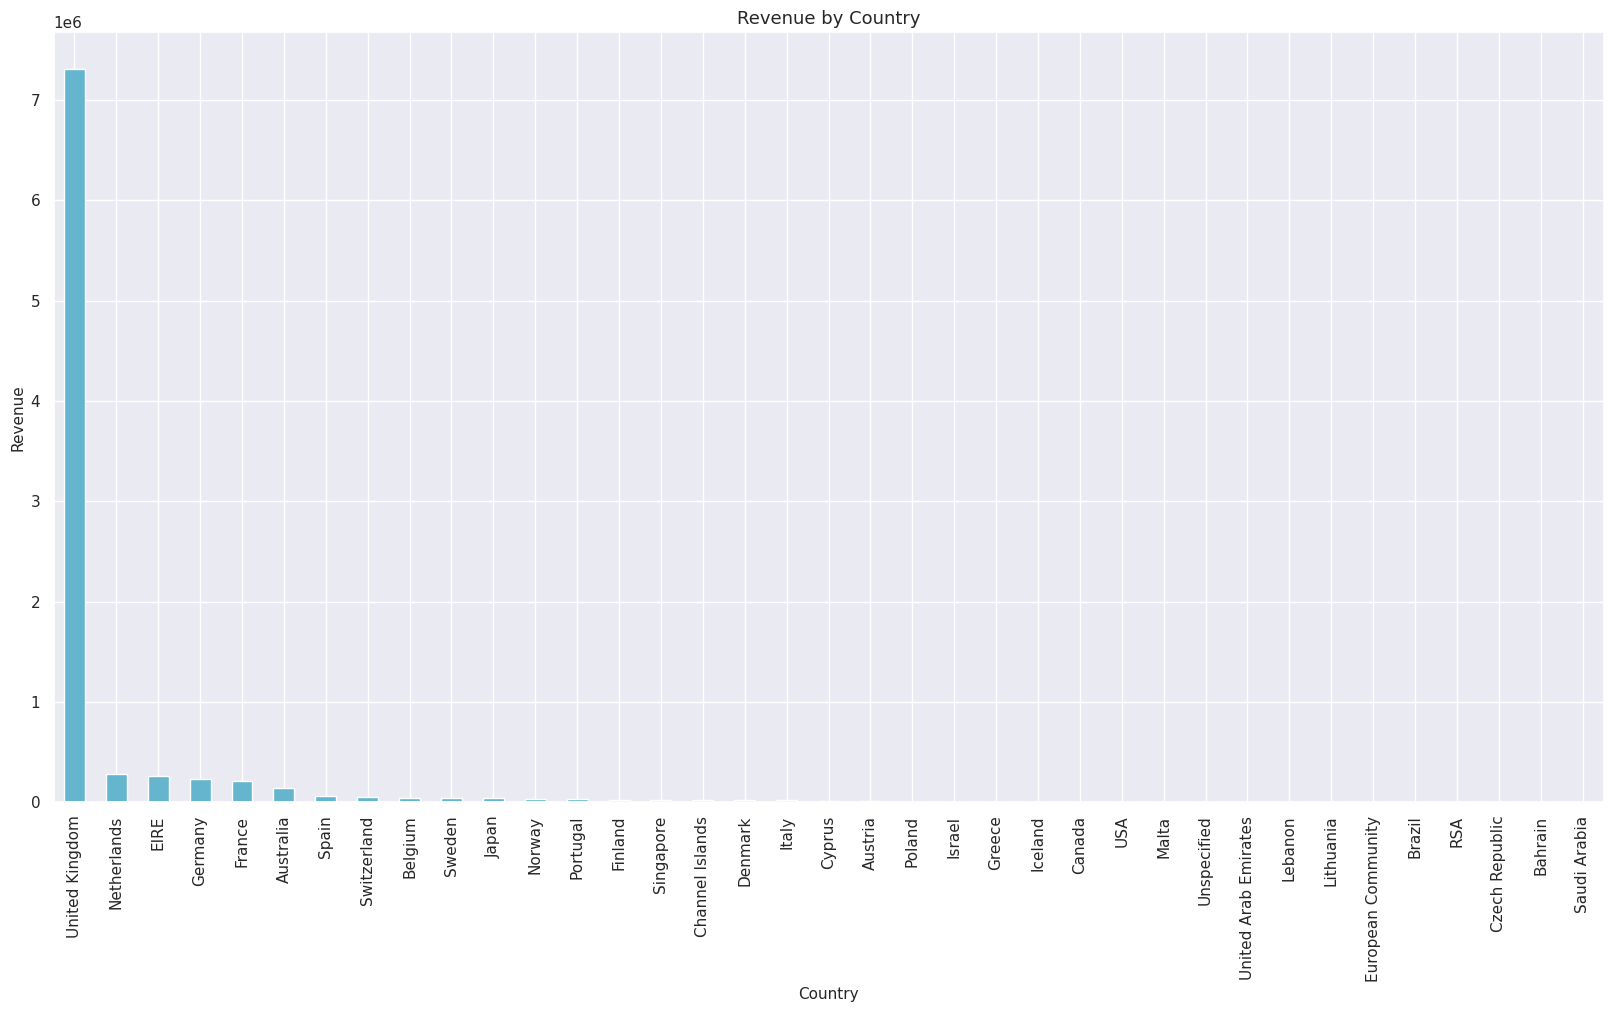

In [ ]:
# le6 :값이 큰 경우 지수를 사용함
sns.set_theme()
COLORS = sns.color_palette()

rev_by_contries.plot(kind="bar", figsize=(20,10), color=COLORS[-1]);
plt.xlabel("Country", fontsize=11)
plt.ylabel("Revenue", fontsize=11)
plt.title("Revenue by Country", fontsize=13);

In [ ]:
def plot_bar(df, xlabel, ylabel, title,  color=COLORS[0], figsize=(20,10), rot=45):
  df.plot(kind="bar", figsize=figsize, color=color);
  plt.xlabel(xlabel, fontsize=11)
  plt.ylabel(ylabel, fontsize=11)
  plt.title(title, fontsize=13);

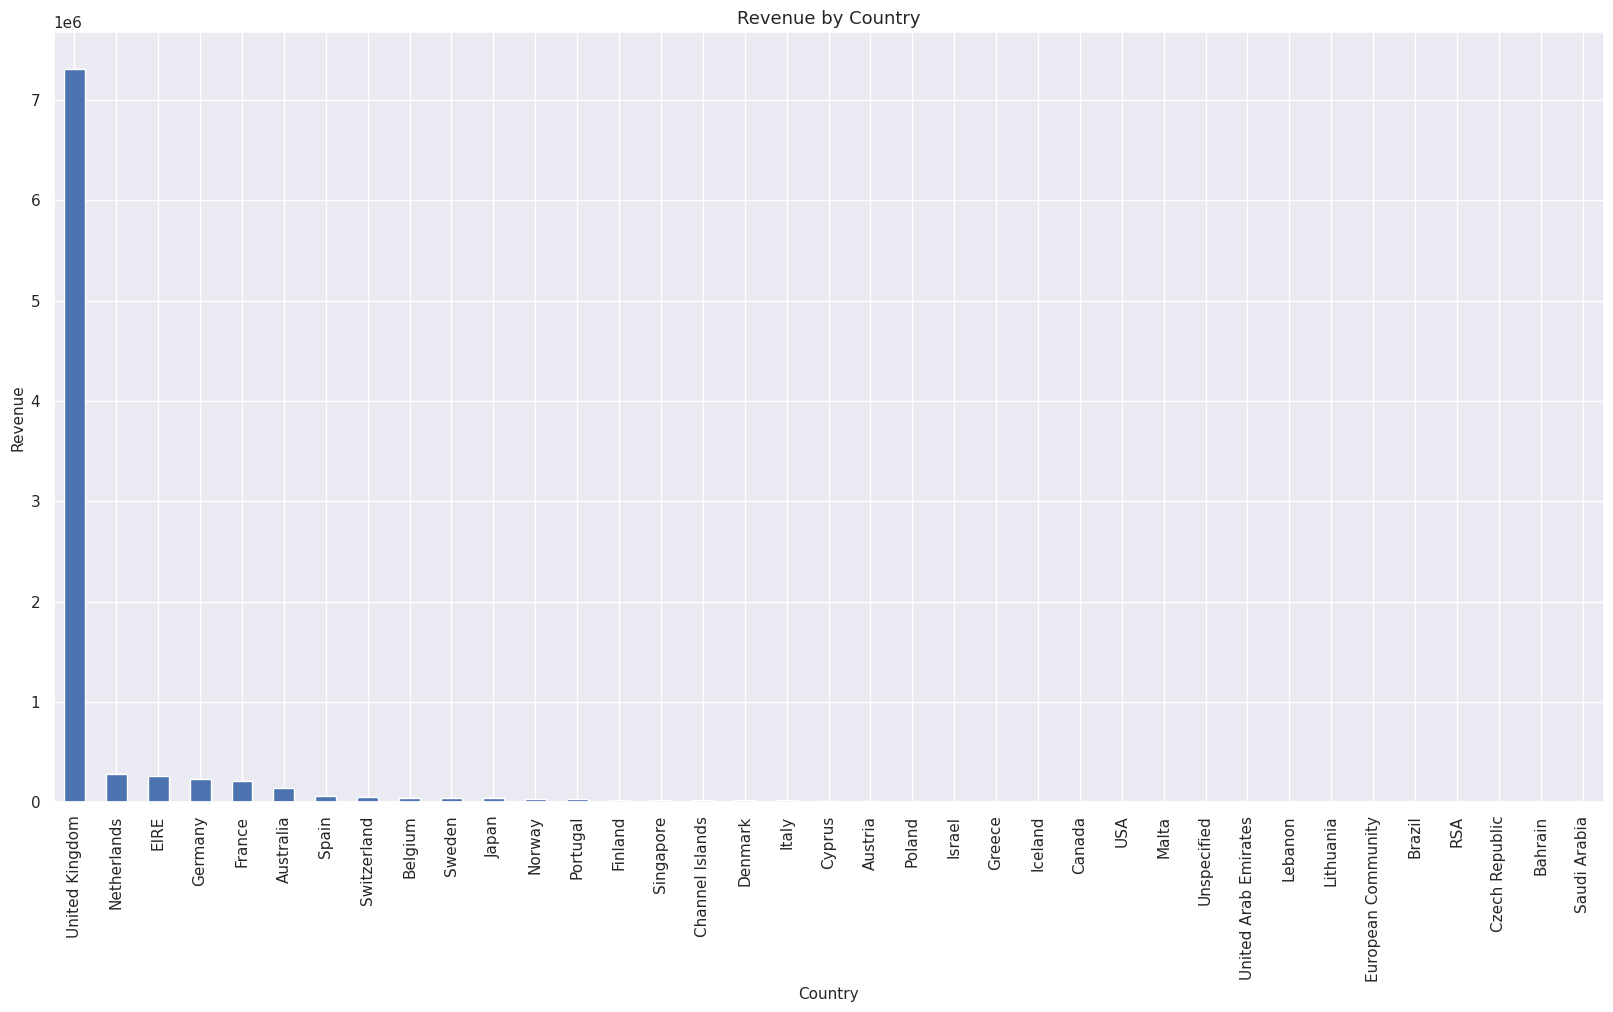

In [ ]:
plot_bar(rev_by_contries, "Country", "Revenue", "Revenue by Country")

In [ ]:
# 월별매출 201012, 201112

df_retail['InvoiceDate'].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [ ]:
def extract_month(date):
  month = str(date.month)

  if date.month < 10:
    month = '0'+month

  return str(date.year) + month

In [ ]:
# groupby() : 함수가 들어갈 수 있음
rev_by_month  = df_retail.set_index('InvoiceDate').groupby(extract_month)['CheckoutPrice'].sum()
rev_by_month

InvoiceDate
201012     572713.890
201101     569445.040
201102     447137.350
201103     595500.760
201104     469200.361
201105     678594.560
201106     661213.690
201107     600091.011
201108     645343.900
201109     952838.382
201110    1039318.790
201111    1161817.380
201112     518192.790
Name: CheckoutPrice, dtype: float64

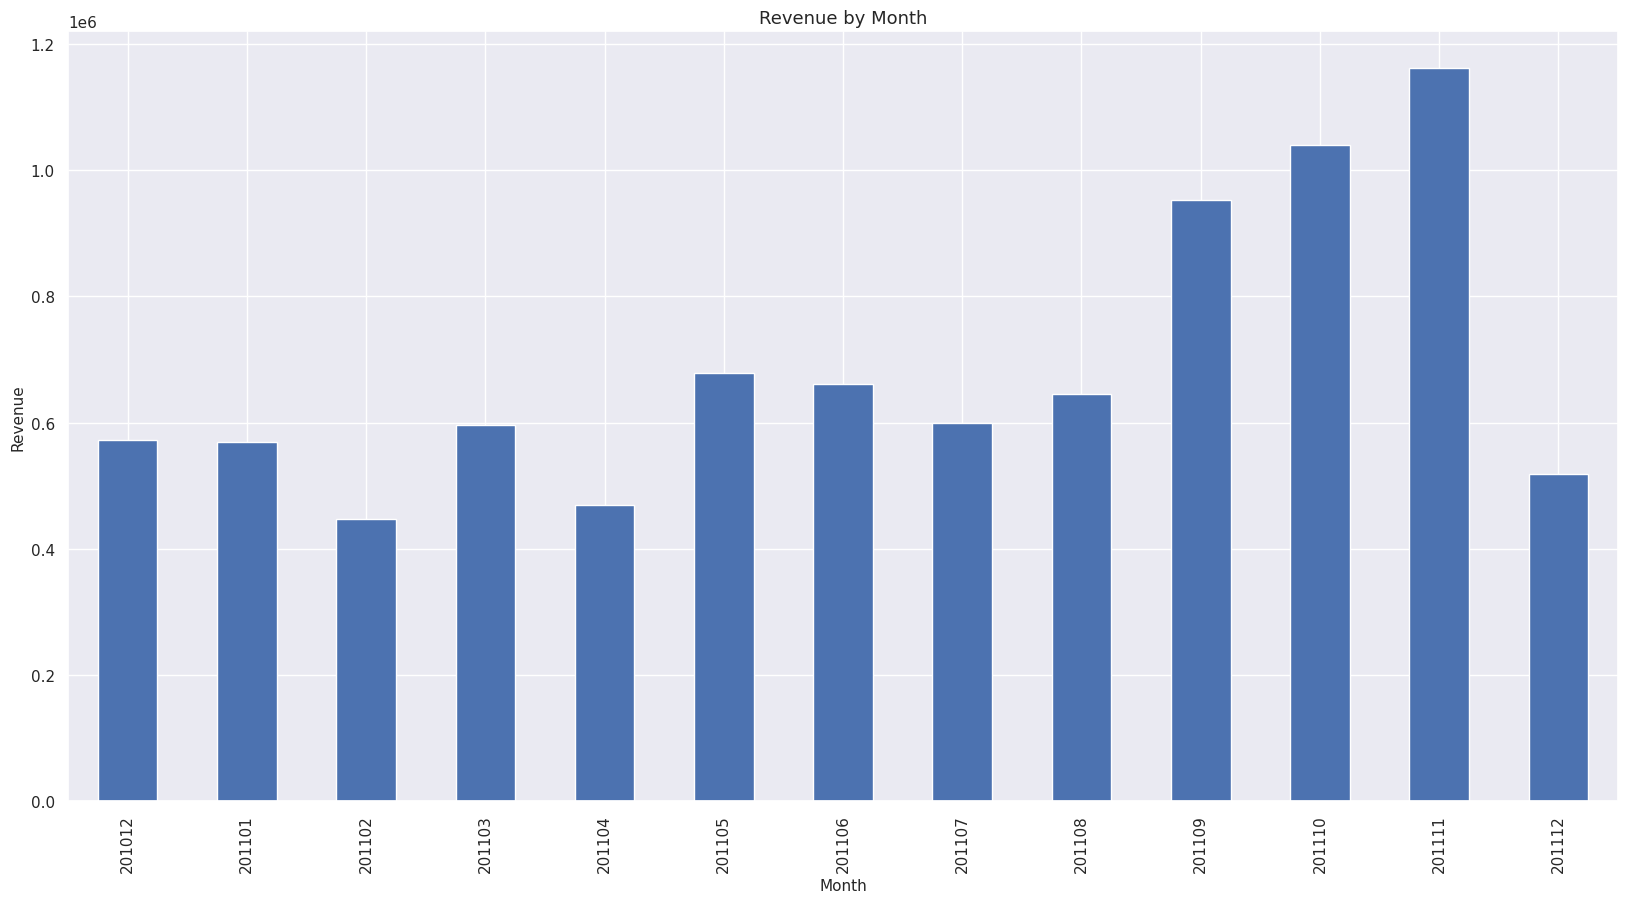

In [ ]:
plot_bar(rev_by_month, "Month", "Revenue", "Revenue by Month")

In [ ]:
date = pd.to_datetime('2024-06-16')

# 월:0, 일:6
# day_of_week : 요일을 숫자로 받아낼 수 있음
date.day_of_week

6

In [ ]:
# 요일별 매출

rev_by_dow = df_retail.set_index('InvoiceDate').groupby(lambda d:d.day_of_week)['CheckoutPrice'].sum()
rev_by_dow

InvoiceDate
0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: CheckoutPrice, dtype: float64

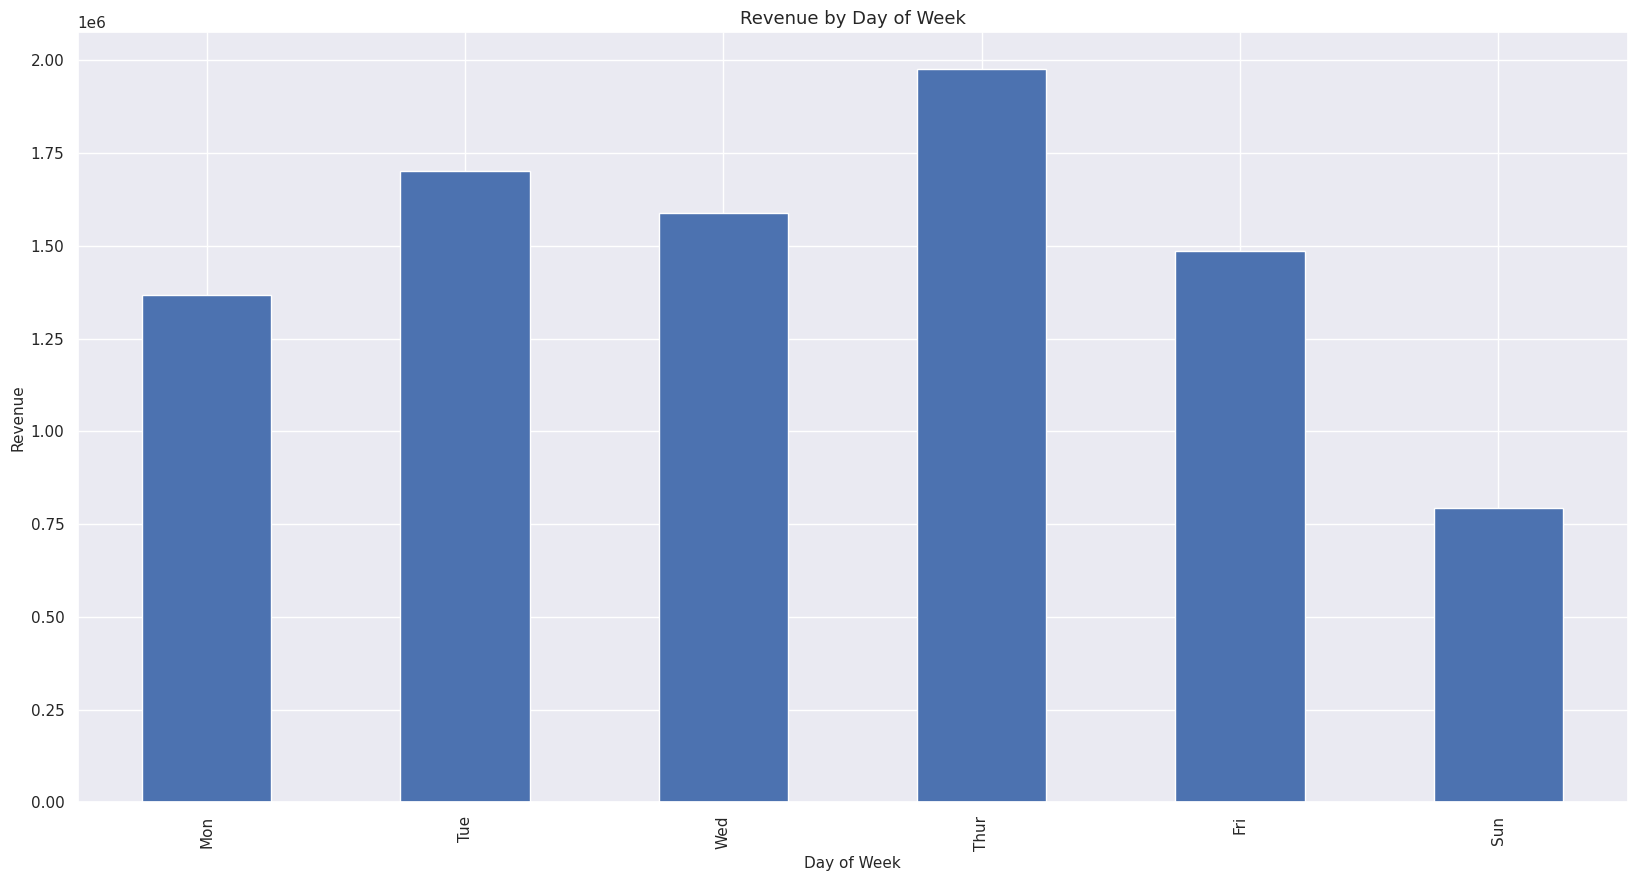

In [ ]:
# 0 → Mon, 1 → Tue ~ 으로 바꾸기
DAY_OF_WEEK = np.array(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
# DAY_OF_WEEK[1]

# 요일명으로 인덱스 변환
rev_by_dow.index = DAY_OF_WEEK[rev_by_dow.index]

plot_bar(rev_by_dow, "Day of Week", "Revenue", "Revenue by Day of Week")

In [ ]:
# 시간별매출

rev_by_hour = df_retail.set_index('InvoiceDate').groupby(lambda d:d.hour)['CheckoutPrice'].sum()
rev_by_hour

InvoiceDate
6           4.250
7       31059.210
8      282115.630
9      842605.171
10    1261192.571
11    1104558.750
12    1378571.480
13    1173264.750
14     995629.371
15     966191.750
16     468885.800
17     234413.521
18     104954.430
19      49028.460
20      18932.760
Name: CheckoutPrice, dtype: float64

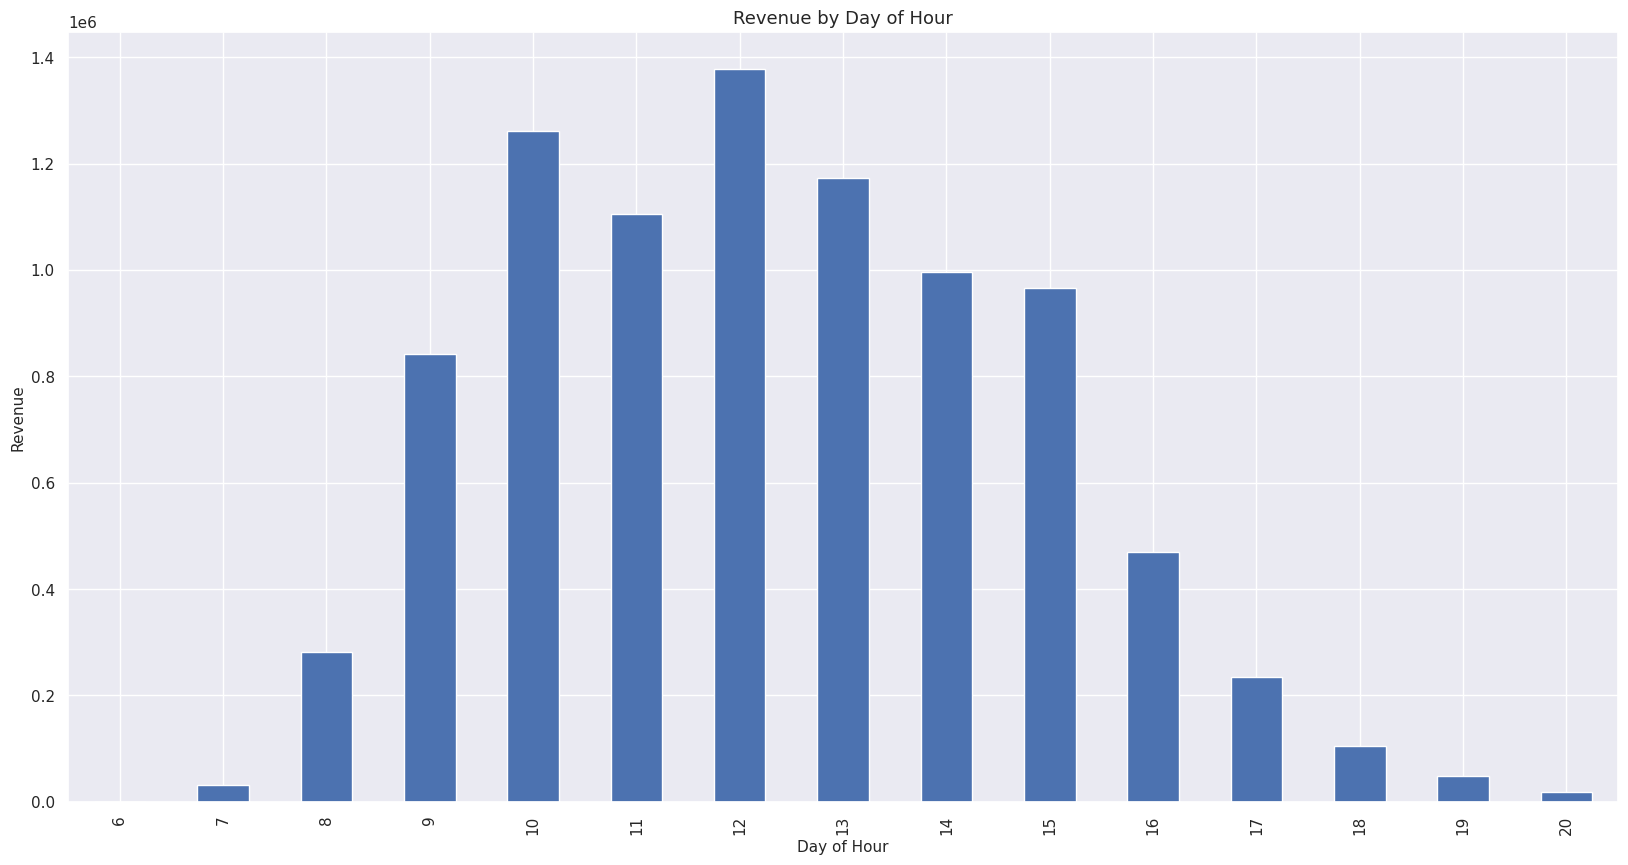

In [ ]:
plot_bar(rev_by_hour, "Day of Hour", "Revenue", "Revenue by Day of Hour")

- 전체 매출의 82% 가 UK 에서 발생
- 2011 년도의 매출액이 가장 높았던 달은 11월
  - 블랙프라이데이, 사이버먼데이, 크리스마스 휴일 등으로 인한 매출액 증가
- 일주일 중 목요일까지는 성장세를 보이고, 이후로 하락
- 7시를 기준으로 주문이 발생하며 12시까지 증가세, 15시 이후부터는 매출액 급락

### 제품
- Top 10 판매 제품
- Top 10 매출 제품

In [ ]:
df_retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'CheckoutPrice'],
      dtype='object')

In [ ]:
# Top 10 판매 제품
# 'StockCode' 를 기준으로 'Quantity' 합을 구한 뒤 상위 10개 추출

top_selling = df_retail.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)[:10]
top_selling

StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int64

In [ ]:
# Top 10 매출 제품
# 'StockCode' 를 기준으로 'CheckoutPrice' 합을 구한 뒤 상위 10개 추출

top_revenue = df_retail.groupby('StockCode')['CheckoutPrice'].sum().sort_values(ascending=False)[:10]
top_revenue

StockCode
23843     168469.60
22423     142592.95
85123A    100603.50
85099B     85220.78
23166      81416.73
POST       77803.96
47566      68844.33
84879      56580.34
M          53779.93
23084      51346.20
Name: CheckoutPrice, dtype: float64

In [ ]:
top_selling3 = df_retail.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(3)
top_selling3

StockCode
23843    80995
23166    77916
84077    54415
Name: Quantity, dtype: int64

In [ ]:
# 전체
# df_retail.set_index('InvoiceDate').groupby(['StockCode', extract_month])[['Quantity', 'CheckoutPrice']].sum()

# Top3 만 추출
df_retail.set_index('InvoiceDate').groupby(['StockCode', extract_month])[['Quantity', 'CheckoutPrice']].sum().loc[top_selling3.index]

Quantity  CheckoutPrice
StockCode InvoiceDate                         
23843     201112          80995      168469.60
23166     201101          74215       77183.60
          201105            792         869.04
          201106            391         458.51
          201107            718         826.94
          201108            405         486.09
          201109            342         397.26
          201110            235         283.67
          201111            631         708.11
          201112            187         203.51
84077     201012           5139        1150.47
          201101           1488         385.44
          201102           3457         795.17
          201103           3888         943.20
          201104          10224        2281.44
          201105           4944        1249.44
          201106           1920         533.76
          201107           3600         982.56
          201108           2256         654.24
          201109           3462         985.70
          201110           8174        1953.98
          201111           4500        1294.20
          201112           1363         376.65

### 자주 등장하는 상품명
- 워드클라우드

In [ ]:
!pip install wordcloud

In [ ]:
text = open('/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/data/constitution.txt').read()
text

'We the People of the United States, in Order to form a more perfect Union, establish Justice, insure domestic Tranquility, provide for the common defence, promote the general Welfare, and secure the Blessings of Liberty to ourselves and our Posterity, do ordain and establish this Constitution for the United States of America.\n\nArticle. I.\n\nSection. 1.\n\nAll legislative Powers herein granted shall be vested in a Congress of the United States, which shall consist of a Senate and House of Representatives.\n\nSection. 2.\n\nThe House of Representatives shall be composed of Members chosen every second Year by the People of the several States, and the Electors in each State shall have the Qualifications requisite for Electors of the most numerous Branch of the State Legislature.\n\nNo Person shall be a Representative who shall not have attained to the Age of twenty five Years, and been seven Years a Citizen of the United States, and who shall not, when elected, be an Inhabitant of that

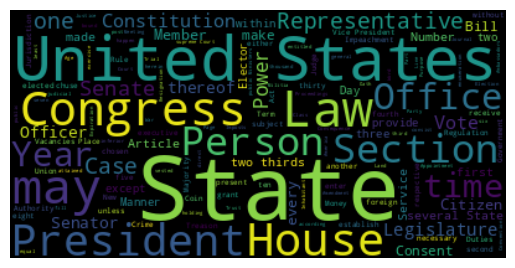

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

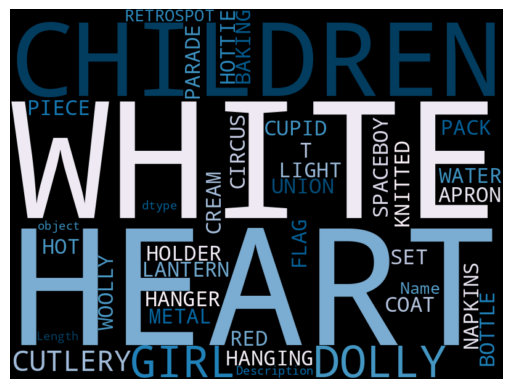

In [ ]:
wordcloud = WordCloud(
    background_color='black', width=800, height=600, colormap='PuBu'
)
wordcloud.generate(str(df_retail['Description']))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 우수고객
- 구매 횟수 기준
- 지불 금액 기준

In [ ]:
# 구매횟수

df_retail.groupby('CustomerID')['Quantity'].count().sort_values(ascending=False).head(10)

CustomerID
17841    7847
14911    5675
14096    5111
12748    4595
14606    2700
15311    2379
14646    2076
13089    1818
13263    1677
14298    1637
Name: Quantity, dtype: int64

In [ ]:
# 금액기준
df_retail.groupby('CustomerID')['CheckoutPrice'].sum().sort_values(ascending=False).head(10)

CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
12415    124914.53
14156    117379.63
17511     91062.38
16029     81024.84
12346     77183.60
Name: CheckoutPrice, dtype: float64

### 월간 사용자 cohort를 바탕으로 월별 재구매율 분석
- heatmap 시각화

In [ ]:
# cohort : 특정 기간 동안 공통된 특성이나 경험을 갖는 사용자 집단

# 일자를 모두 1로 변경하는 함수
# 2011-12-11 → 2011-12-01
# 2011-03-11 → 2011-03-01

from datetime import datetime

def get_month_as_datetime(date):
  return datetime(date.year, date.month, 1)

In [ ]:
df_retail['Month'] = df_retail['InvoiceDate'].apply(get_month_as_datetime)

In [ ]:
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


In [ ]:
# 사용자의 첫 구매월

month_group = df_retail.groupby('CustomerID')['Month']
# df_retail['MonthStarted'] = min(month_group)
df_retail['MonthStarted'] = month_group.transform(np.min)

In [ ]:
df_retail.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month,MonthStarted
291197,571418,23145,ZINC T-LIGHT HOLDER STAR LARGE,2,2011-10-17 12:35:00,0.95,16412,United Kingdom,1.90,2011-10-01,2011-10-01
117402,551528,15036,ASSORTED COLOURS SILK FAN,24,2011-05-01 12:54:00,0.83,12841,United Kingdom,19.92,2011-05-01,2010-12-01
306378,572854,22726,ALARM CLOCK BAKELIKE GREEN,10,2011-10-26 12:28:00,3.39,14096,United Kingdom,33.90,2011-10-01,2011-08-01
236615,566239,23207,LUNCH BAG ALPHABET DESIGN,10,2011-09-11 11:26:00,1.65,14665,United Kingdom,16.50,2011-09-01,2011-02-01
379742,579692,21872,GLAMOROUS MUG,12,2011-11-30 14:05:00,1.25,12433,Norway,15.00,2011-11-01,2010-12-01
195019,561363,84997B,CHILDRENS CUTLERY RETROSPOT RED,2,2011-07-26 15:42:00,4.15,17238,United Kingdom,8.30,2011-07-01,2010-12-01
392124,580972,22169,FAMILY ALBUM WHITE PICTURE FRAME,8,2011-12-06 15:10:00,7.65,15194,United Kingdom,61.20,2011-12-01,2010-12-01
46268,542617,21690,SILVER CANDLEPOT JARDIN,2,2011-01-30 15:48:00,3.75,17463,United Kingdom,7.50,2011-01-01,2011-01-01
316667,573870,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,1,2011-11-01 12:25:00,2.95,14485,United Kingdom,2.95,2011-11-01,2011-11-01
200574,562037,22617,BAKING SET SPACEBOY DESIGN,3,2011-08-02 09:34:00,4.95,13023,United Kingdom,14.85,2011-08-01,2011-08-01


In [ ]:
# 최초 구매일로부터 몇 개월이 지난 후 재구매를 했는가?
# MonthPassed = Month - MonthStarted
# 2011-03-01 - 2010-12-01
# 2011-2010 = 1 * 12
# 3-12 = -9
# 12 + (-9)

df_retail['MonthPassed'] = (df_retail['Month'].dt.year - df_retail['MonthStarted'].dt.year) * 12 + \
    (df_retail['Month'].dt.month - df_retail['MonthStarted'].dt.month)

In [ ]:
df_retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month,MonthStarted,MonthPassed
397879,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-01,2011-08-01,4
397880,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-01,2011-08-01,4
397881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01,4
397882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01,4
397883,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011-12-01,2011-08-01,4


In [ ]:
df_cohort = df_retail.groupby(['MonthStarted', 'MonthPassed'])['CustomerID'].apply(lambda x:len(np.unique(x))).reset_index()
df_cohort

,MonthStarted,MonthPassed,CustomerID
0,2010-12-01,0,885
1,2010-12-01,1,324
2,2010-12-01,2,286
3,2010-12-01,3,340
4,2010-12-01,4,321
...,...,...,...
86,2011-10-01,1,86
87,2011-10-01,2,41
88,2011-11-01,0,323
89,2011-11-01,1,36


In [ ]:
df_cohort = df_cohort.pivot(index='MonthStarted', columns='MonthPassed')

In [ ]:
df_cohort.head()

CustomerID                                                   \
MonthPassed          0      1      2      3      4      5      6      7    
MonthStarted                                                               
2010-12-01        885.0  324.0  286.0  340.0  321.0  352.0  321.0  309.0   
2011-01-01        417.0   92.0  111.0   96.0  134.0  120.0  103.0  101.0   
2011-02-01        380.0   71.0   71.0  108.0  103.0   94.0   96.0  106.0   
2011-03-01        452.0   68.0  114.0   90.0  101.0   76.0  121.0  104.0   
2011-04-01        300.0   64.0   61.0   63.0   59.0   68.0   65.0   78.0   

                                                 
MonthPassed      8      9      10     11     12  
MonthStarted                                     
2010-12-01    313.0  350.0  331.0  445.0  235.0  
2011-01-01    125.0  136.0  152.0   49.0    NaN  
2011-02-01     94.0  116.0   26.0    NaN    NaN  
2011-03-01    126.0   39.0    NaN    NaN    NaN  
2011-04-01     22.0    NaN    NaN    NaN    NaN

In [ ]:
df_cohort_rate = round(df_cohort.div(df_cohort.iloc[:,0], axis=0) * 100, 2)
df_cohort_rate

CustomerID                                                   \
MonthPassed          0      1      2      3      4      5      6      7    
MonthStarted                                                               
2010-12-01        100.0  36.61  32.32  38.42  36.27  39.77  36.27  34.92   
2011-01-01        100.0  22.06  26.62  23.02  32.13  28.78  24.70  24.22   
2011-02-01        100.0  18.68  18.68  28.42  27.11  24.74  25.26  27.89   
2011-03-01        100.0  15.04  25.22  19.91  22.35  16.81  26.77  23.01   
2011-04-01        100.0  21.33  20.33  21.00  19.67  22.67  21.67  26.00   
2011-05-01        100.0  19.01  17.25  17.25  20.77  23.24  26.41   9.51   
2011-06-01        100.0  17.36  15.70  26.45  23.14  33.47   9.50    NaN   
2011-07-01        100.0  18.09  20.74  22.34  27.13  11.17    NaN    NaN   
2011-08-01        100.0  20.71  24.85  24.26  12.43    NaN    NaN    NaN   
2011-09-01        100.0  23.41  30.10  11.37    NaN    NaN    NaN    NaN   
2011-10-01        100.0  24.02  11.45    NaN    NaN    NaN    NaN    NaN   
2011-11-01        100.0  11.15    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01        100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                                 
MonthPassed      8      9      10     11     12  
MonthStarted                                     
2010-12-01    35.37  39.55  37.40  50.28  26.55  
2011-01-01    29.98  32.61  36.45  11.75    NaN  
2011-02-01    24.74  30.53   6.84    NaN    NaN  
2011-03-01    27.88   8.63    NaN    NaN    NaN  
2011-04-01     7.33    NaN    NaN    NaN    NaN  
2011-05-01      NaN    NaN    NaN    NaN    NaN  
2011-06-01      NaN    NaN    NaN    NaN    NaN  
2011-07-01      NaN    NaN    NaN    NaN    NaN  
2011-08-01      NaN    NaN    NaN    NaN    NaN  
2011-09-01      NaN    NaN    NaN    NaN    NaN  
2011-10-01      NaN    NaN    NaN    NaN    NaN  
2011-11-01      NaN    NaN    NaN    NaN    NaN  
2011-12-01      NaN    NaN    NaN    NaN    NaN

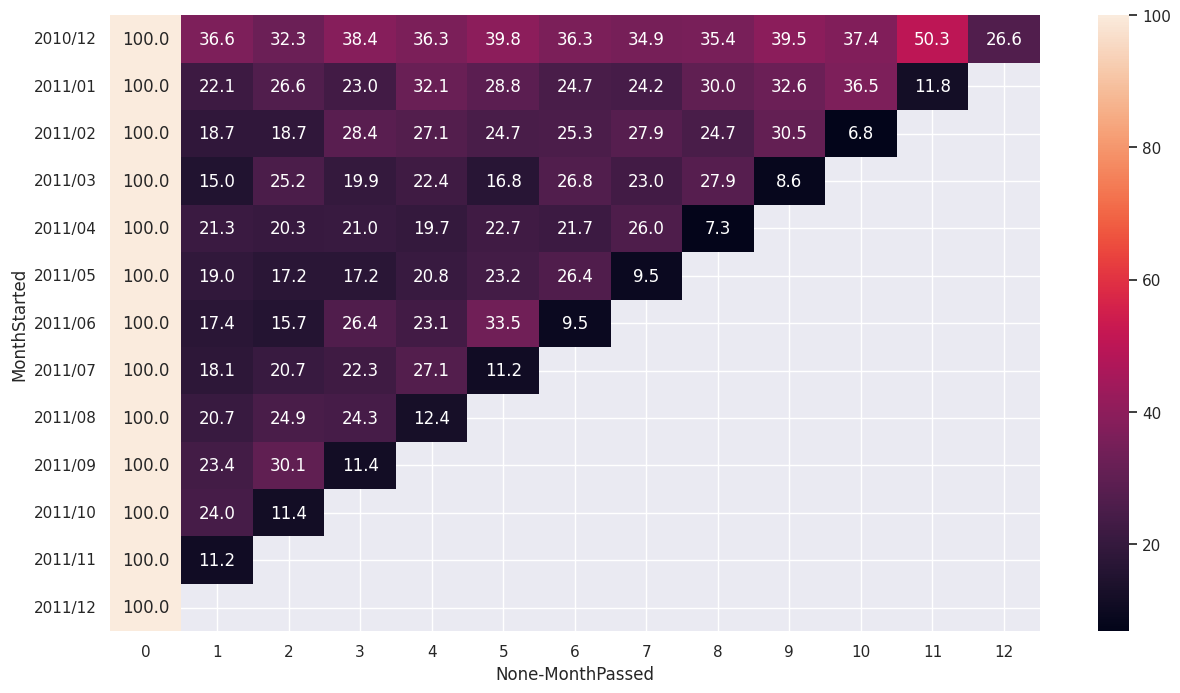

In [ ]:
# 0 ~ 12

plt.figure(figsize=(15,8))
xticks = np.arange(0,13)
yticks = ['2010/12', '2011/01', '2011/02', '2011/03', '2011/04', '2011/05', '2011/06', '2011/07', '2011/08', '2011/09', '2011/10', '2011/11', '2011/12']
sns.heatmap(df_cohort_rate, annot=True, xticklabels=xticks, yticklabels=yticks, fmt=".1f");

In [ ]:
# 2010-12-01 08:26:00
# 시간만 추출하기 (시) → 어느 시간대에 가장 주문율이 높은지 확인
# df_retail['InvoiceDate'].apply(lambda date:date.hour)

order_by_hour = df_retail.set_index('InvoiceDate').groupby(lambda date:date.hour)['CustomerID'].count()
order_by_hour

InvoiceDate
6         1
7       379
8      8690
9     21944
10    37997
11    49084
12    72065
13    64026
14    54118
15    45369
16    24089
17    13071
18     2928
19     3321
20      802
Name: CustomerID, dtype: int64

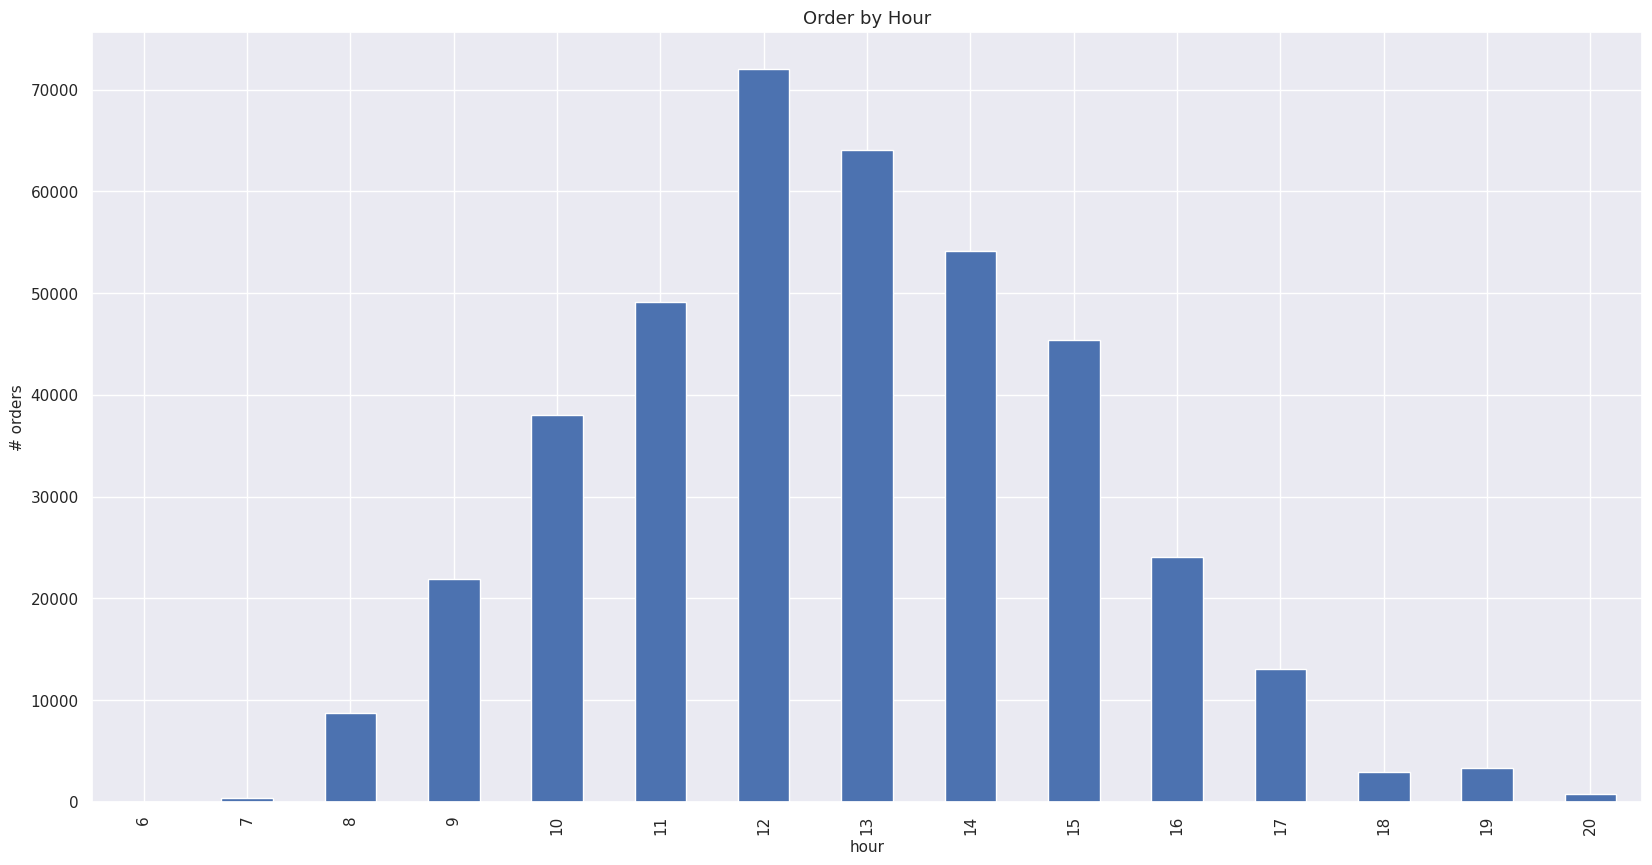

In [ ]:
plot_bar(order_by_hour, "hour","# orders", "Order by Hour")

In [ ]:
# 2010-12-01 08:26:00 : 26 > 30 → 30보다 큰지 확인
# 08:00 + 1(카운트O)
# 08:30 + 0(카운트X)
# 30분 단위로 세분화해서 계산해보기

def half_an_hour(date):
   minute = ":00"
   if date.minute > 30:
    minute = ":30"

   hour = str(date.hour)
   if date.hour < 10:
    hour = "0" + hour

   return hour + minute


order_by_hour_half = df_retail.set_index('InvoiceDate').groupby(half_an_hour)['CustomerID'].count()
order_by_hour_half

InvoiceDate
06:00        1
07:30      379
08:00     3145
08:30     5545
09:00     9364
09:30    12580
10:00    16950
10:30    21047
11:00    18925
11:30    30159
12:00    37174
12:30    34891
13:00    31131
13:30    32895
14:00    26958
14:30    27160
15:00    24227
15:30    21142
16:00    14316
16:30     9773
17:00     8889
17:30     4182
18:00     1715
18:30     1213
19:00     1534
19:30     1787
20:00      802
Name: CustomerID, dtype: int64

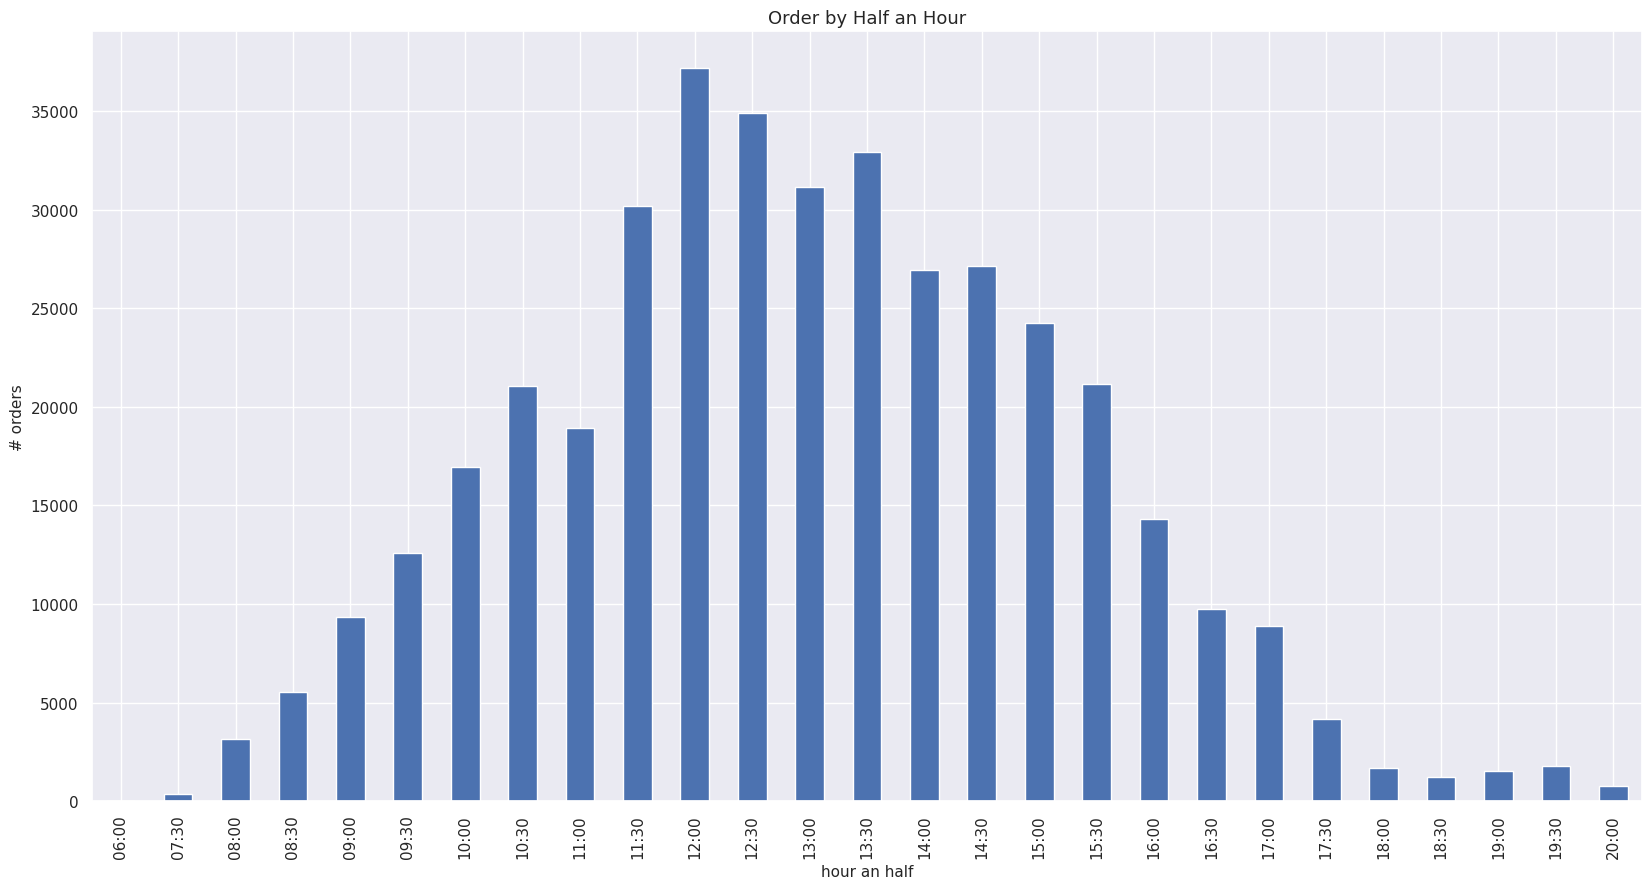

In [ ]:
plot_bar(order_by_hour_half, "hour an half","# orders", "Order by Half an Hour")

In [ ]:
# 시간대별 점유율

order_by_hour_half / order_by_hour_half.sum() * 100

InvoiceDate
06:00    0.000251
07:30    0.095254
08:00    0.790431
08:30    1.393622
09:00    2.353450
09:30    3.161726
10:00    4.260036
10:30    5.289733
11:00    4.756411
11:30    7.579847
12:00    9.342924
12:30    8.769139
13:00    7.824140
13:30    8.267485
14:00    6.775342
14:30    6.826110
15:00    6.088961
15:30    5.313609
16:00    3.598034
16:30    2.456244
17:00    2.234068
17:30    1.051060
18:00    0.431030
18:30    0.304863
19:00    0.385540
19:30    0.449126
20:00    0.201566
Name: CustomerID, dtype: float64

In [ ]:
# 사용자 별 시간대 주문량 확인

order_by_hour_customer = df_retail.set_index('InvoiceDate').groupby(['CustomerID', lambda date:date.hour])['StockCode'].count()

In [ ]:
order_by_hour_customer

CustomerID  InvoiceDate
12346       10              1
12347       8              22
            10             24
            12             47
            13             18
                           ..
18283       15              1
            16             56
            19             87
18287       9               3
            10             67
Name: StockCode, Length: 11205, dtype: int64

In [ ]:
order_by_hour_customer.loc[12347]

InvoiceDate
8     22
10    24
12    47
13    18
14    60
15    11
Name: StockCode, dtype: int64

In [ ]:
# 사용자별 최대주문건수 시간

max_idx = order_by_hour_customer.groupby('CustomerID').idxmax()
max_idx

CustomerID
12346    (12346, 10)
12347    (12347, 14)
12348    (12348, 19)
12349     (12349, 9)
12350    (12350, 16)
            ...     
18280     (18280, 9)
18281    (18281, 10)
18282    (18282, 13)
18283    (18283, 14)
18287    (18287, 10)
Name: StockCode, Length: 4338, dtype: object

In [ ]:
order_by_hour_customer.loc[max_idx]

CustomerID  InvoiceDate
12346       10               1
12347       14              60
12348       19              17
12349       9               73
12350       16              17
                          ... 
18280       9               10
18281       10               7
18282       13               7
18283       14             201
18287       10              67
Name: StockCode, Length: 4338, dtype: int64

In [ ]:
df_log = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/data/web.log", sep="\s",
                     names=['ip','session_id','user_id','datetime','request','url','status','bytesize'])
df_log

,ip,session_id,user_id,datetime,request,url,status,bytesize
0,4.5.4.5,69de169f-6eed-4e4d-ae5b-ff997b8c889f,user89,[01/Dec/2019T00:47:11],GET,/product_list,200,2107
1,4.5.4.5,69de169f-6eed-4e4d-ae5b-ff997b8c889f,user89,[01/Dec/2019T00:51:21],GET,/product_detail,200,1323
2,3.3.3.3.,3d46aad9-17eb-4af1-bc54-6ca91d7f8f6c,user2,[01/Dec/2019T00:51:43],GET,/product_list,200,2616
3,1.0.1.0,57623182-b78b-4bdc-b977-a2b34612c6d1,user45,[01/Dec/2019T01:04:02],GET,/product_list,200,2303
4,3.3.3.3.,3d46aad9-17eb-4af1-bc54-6ca91d7f8f6c,user2,[01/Dec/2019T01:12:28],GET,/product_detail,200,1830
...,...,...,...,...,...,...,...,...
1285,1.0.0.3,ef2d546d-aa5d-4d9f-89be-70df7cb1082a,user4,[20/Dec/2019T12:08:14],GET,/checkout,200,1825
1286,1.0.1.0,63d1f1f5-3a1e-4fbd-819c-cef61af66a6a,user79,[20/Dec/2019T12:23:02],GET,/product_list,200,2548
1287,1.0.1.0,63d1f1f5-3a1e-4fbd-819c-cef61af66a6a,user79,[20/Dec/2019T12:56:12],GET,/product_detail,200,1250
1288,1.0.1.0,63d1f1f5-3a1e-4fbd-819c-cef61af66a6a,user79,[20/Dec/2019T13:12:27],GET,/cart,200,2590


In [ ]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ip          1290 non-null   object
 1   session_id  1290 non-null   object
 2   user_id     1290 non-null   object
 3   datetime    1290 non-null   object
 4   request     1290 non-null   object
 5   url         1290 non-null   object
 6   status      1290 non-null   int64 
 7   bytesize    1290 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 80.8+ KB


In [ ]:
# datetime 컬럼에서 [ ] 제거 : replace

df_log['datetime'] = df_log['datetime'].apply(lambda date:date.replace("[","").replace("]",""))

In [ ]:
# 20/Dec/2019T13:12:28 → 2019-12-20 13:12:28 변경

df_log['datetime'] = pd.to_datetime(df_log['datetime'], format="%d/%b/%YT%H:%M:%S")

In [ ]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ip          1290 non-null   object        
 1   session_id  1290 non-null   object        
 2   user_id     1290 non-null   object        
 3   datetime    1290 non-null   datetime64[ns]
 4   request     1290 non-null   object        
 5   url         1290 non-null   object        
 6   status      1290 non-null   int64         
 7   bytesize    1290 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 80.8+ KB


In [ ]:
# url 컬럼 안 값들 확인

df_log['url'].value_counts()

url
/product_list      419
/product_detail    351
/cart              261
/checkout          175
/order_complete     84
Name: count, dtype: int64

In [ ]:
funnel_dict = {"/product_list":1, "/product_detail":2, "/cart":3, "/order_complete":4}
funnel_steps = pd.DataFrame.from_dict(funnel_dict, orient="index", columns=["step_no"])
funnel_steps

,step_no
/product_list,1
/product_detail,2
/cart,3
/order_complete,4


In [ ]:
df_group = df_log.groupby(['session_id','url'])['datetime'].min()

In [ ]:
df_group.head(1)

session_id                            url            
000d99d8-d2d4-4e9a-bb06-69b1ae6442d9  /product_detail   2019-12-01 12:06:39
Name: datetime, dtype: datetime64[ns]

In [ ]:
# concat: 두 개의 테이블의 형태가 같을 때 사용 / merge : 두 개의 테이블의 형태가 다를 때 사용
# df_group & funnel_steps 두 개 merge 하기

df_group = pd.DataFrame(df_group).merge(funnel_steps, left_on='url', right_index=True)
df_group.head()

,,datetime,step_no
session_id,url,,
000d99d8-d2d4-4e9a-bb06-69b1ae6442d9,/product_detail,2019-12-01 12:06:39,2
0155049d-32e7-44de-9b0d-4c02f63d6099,/product_detail,2019-12-04 00:22:44,2
020d4536-1341-4de1-87d3-e22ba8611af6,/product_detail,2019-12-19 06:25:48,2
0381411a-78d8-4c27-9622-3210b7ed62d6,/product_detail,2019-12-05 05:09:32,2
06268108-6228-4237-ac1d-7927dd44273d,/product_detail,2019-12-11 04:17:31,2


In [ ]:
# url 옆으로 배치하기
# pivot : index=session_id, columns=step_no, values=datetime
funnel_pivot = df_group.reset_index().pivot(index="session_id", columns="step_no", values="datetime")
funnel_pivot.columns = funnel_steps.index
funnel_pivot.head()

,/product_list,/product_detail,/cart,/order_complete
session_id,,,,
000d99d8-d2d4-4e9a-bb06-69b1ae6442d9,2019-12-01 11:52:32,2019-12-01 12:06:39,NaT,NaT
0155049d-32e7-44de-9b0d-4c02f63d6099,2019-12-04 00:12:47,2019-12-04 00:22:44,NaT,NaT
020d4536-1341-4de1-87d3-e22ba8611af6,2019-12-19 06:22:54,2019-12-19 06:25:48,2019-12-19 06:58:23,NaT
0381411a-78d8-4c27-9622-3210b7ed62d6,2019-12-05 04:48:34,2019-12-05 05:09:32,2019-12-05 05:35:16,NaT
06268108-6228-4237-ac1d-7927dd44273d,2019-12-11 04:15:46,2019-12-11 04:17:31,2019-12-11 04:45:05,NaT


In [ ]:
for idx in funnel_steps.index:
  # print(idx)
  print(funnel_pivot[idx].notnull().sum())

419
351
261
84


In [ ]:
step_values = [funnel_pivot[idx].notnull().sum() for idx in funnel_steps.index]
step_values

[419, 351, 261, 84]

In [ ]:
!pip install plotly

In [ ]:
from plotly import graph_objects as go

def show_funnel(funnl_values, funnel_steps):
  fig = go.Figure(go.Funnel(
      y = funnel_steps,
      x = funnl_values))

  fig.show()

In [ ]:
show_funnel(step_values, funnel_steps.index)

In [ ]:
# 평균 시간 계산
np.mean(funnel_pivot['/product_detail'] - funnel_pivot['/product_list'])

Timedelta('0 days 00:16:50.635327635')

In [ ]:
np.mean(funnel_pivot['/cart'] - funnel_pivot['/product_detail'])

Timedelta('0 days 00:18:42.804597701')

In [ ]:
np.mean(funnel_pivot['/order_complete'] - funnel_pivot['/cart'])

Timedelta('0 days 00:33:35.904761904')